In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

In [10]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [11]:
import keras
from keras import layers

In [12]:
# Load the data and split it between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


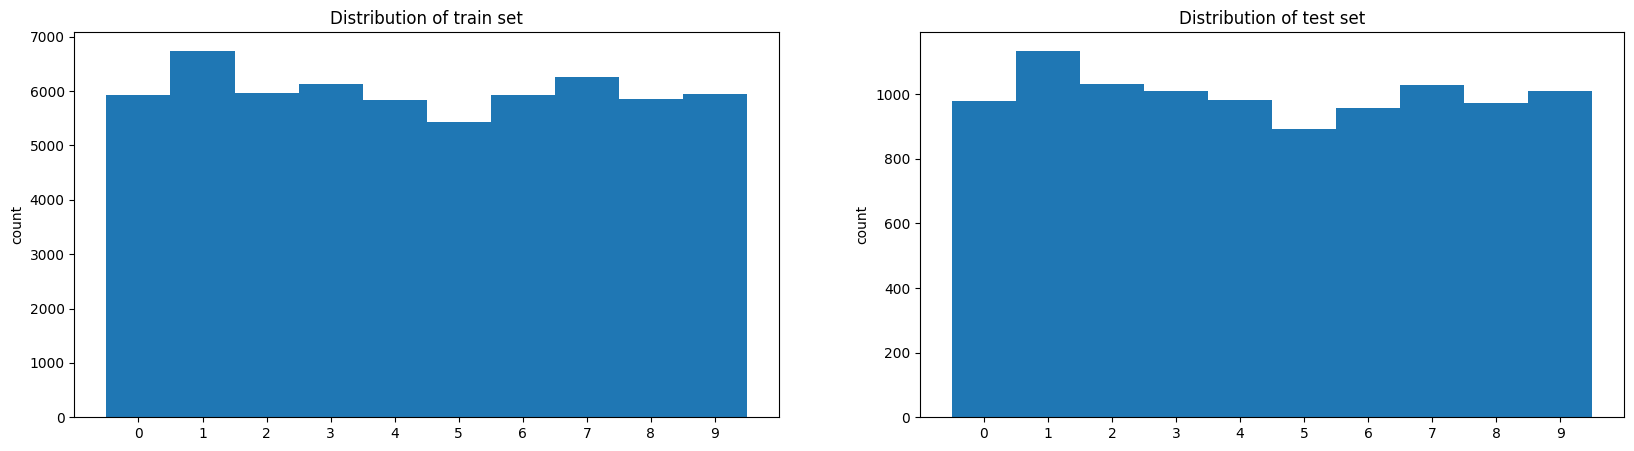

In [14]:
figure = plt.figure(figsize=(20, 5))
figure.add_subplot(1, 2, 1)
plt.hist(y_train, bins=np.arange(11) - 0.5)
plt.xticks(np.arange(10))
plt.ylabel('count')
plt.title('Distribution of train set');

figure.add_subplot(1, 2, 2)
plt.hist(y_test, bins=np.arange(11) - 0.5)
plt.xticks(np.arange(10))
plt.ylabel('count')
plt.title('Distribution of test set');
plt.savefig('HW2-q2-q2-3')


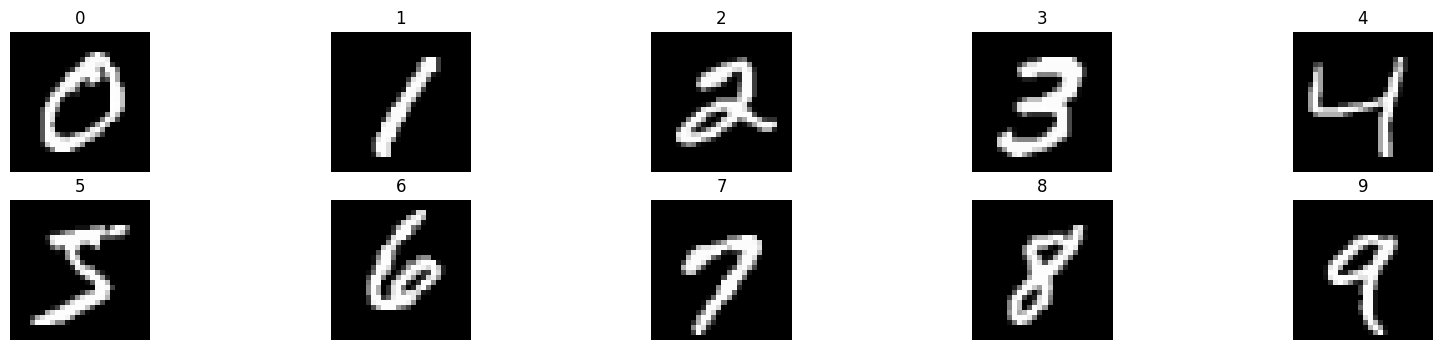

In [15]:
figure = plt.figure(figsize=(20,4))

for i in range(0, 5):
  for j in range(0, 2):
    for k in range(len(y_train)):
      if y_train[k] == i+5*j:
          image = X_train[k]
          label = y_train[k]
          figure.add_subplot(2, 5, i+5*j+1)
          plt.title(label)
          plt.axis('off')
          plt.imshow(image.squeeze(), cmap='gray')
          break
plt.savefig('HW1-Q2-Q2-2.png')


In [16]:
# Scale images to the [0, 1] range
X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - np.min(X_train)) / (np.max(X_train) - np.min(X_train))

In [17]:
np.unique(X_test)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [18]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [19]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [20]:
model = keras.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

2024-04-09 22:45:26.646526: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-09 22:45:26.793138: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-09 22:45:26.793910: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 472042 (1.80 MB)
Trainable params: 472042 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
keras.utils.plot_model(model, to_file='model.png',
                       show_shapes=True, show_dtype=True,
                       show_layer_activations=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=6e-5),
              metrics=['accuracy'])


In [24]:
model.fit(X_train, y_train, epochs=25)
# model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25


2024-04-09 22:45:32.924895: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-09 22:45:33.353683: I external/local_xla/xla/service/service.cc:168] XLA service 0x793e37439e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-09 22:45:33.353702: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-04-09 22:45:33.410771: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-09 22:45:33.437329: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1712690133.505468   31702 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 9s 4ms/step - loss: 0.5205 - accuracy: 0.8706
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1999 - accuracy: 0.9436
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1480 - accuracy: 0.9580
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1187 - accuracy: 0.9661
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0982 - accuracy: 0.9718
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0826 - accuracy: 0.9764
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0703 - accuracy: 0.9806
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0604 - accuracy: 0.9832
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9854
Epoch 10/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0445 - accurac

In [25]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 14.5551 - accuracy: 0.9816


In [26]:
model.save("model.keras")

In [27]:
model = keras.saving.load_model("model.keras")

In [28]:
def fgsm(model, X, y, epsilon=0.1):
    # Initialize perturbation with zeros
    perturbation = tf.zeros_like(X)
    # Define loss function
    loss_fn = CategoricalCrossentropy()
    with tf.GradientTape() as tape:
        tape.watch(perturbation)
        perturbed_images = X + perturbation
        predictions = model(perturbed_images)
        loss = loss_fn(y, predictions)
        gradients = tape.gradient(loss, perturbation)
        return tf.clip_by_value(X+epsilon*tf.sign(gradients), 0, 1)

In [29]:
perturbed_x_train = fgsm(model, X_train.copy(), y_train.copy())

In [30]:
model.evaluate(perturbed_x_train, y_train, batch_size=128)
predict = model.predict(perturbed_x_train, verbose = 0)

469/469 [==============================] - 1s 2ms/step - loss: 12.6676 - accuracy: 0.1382


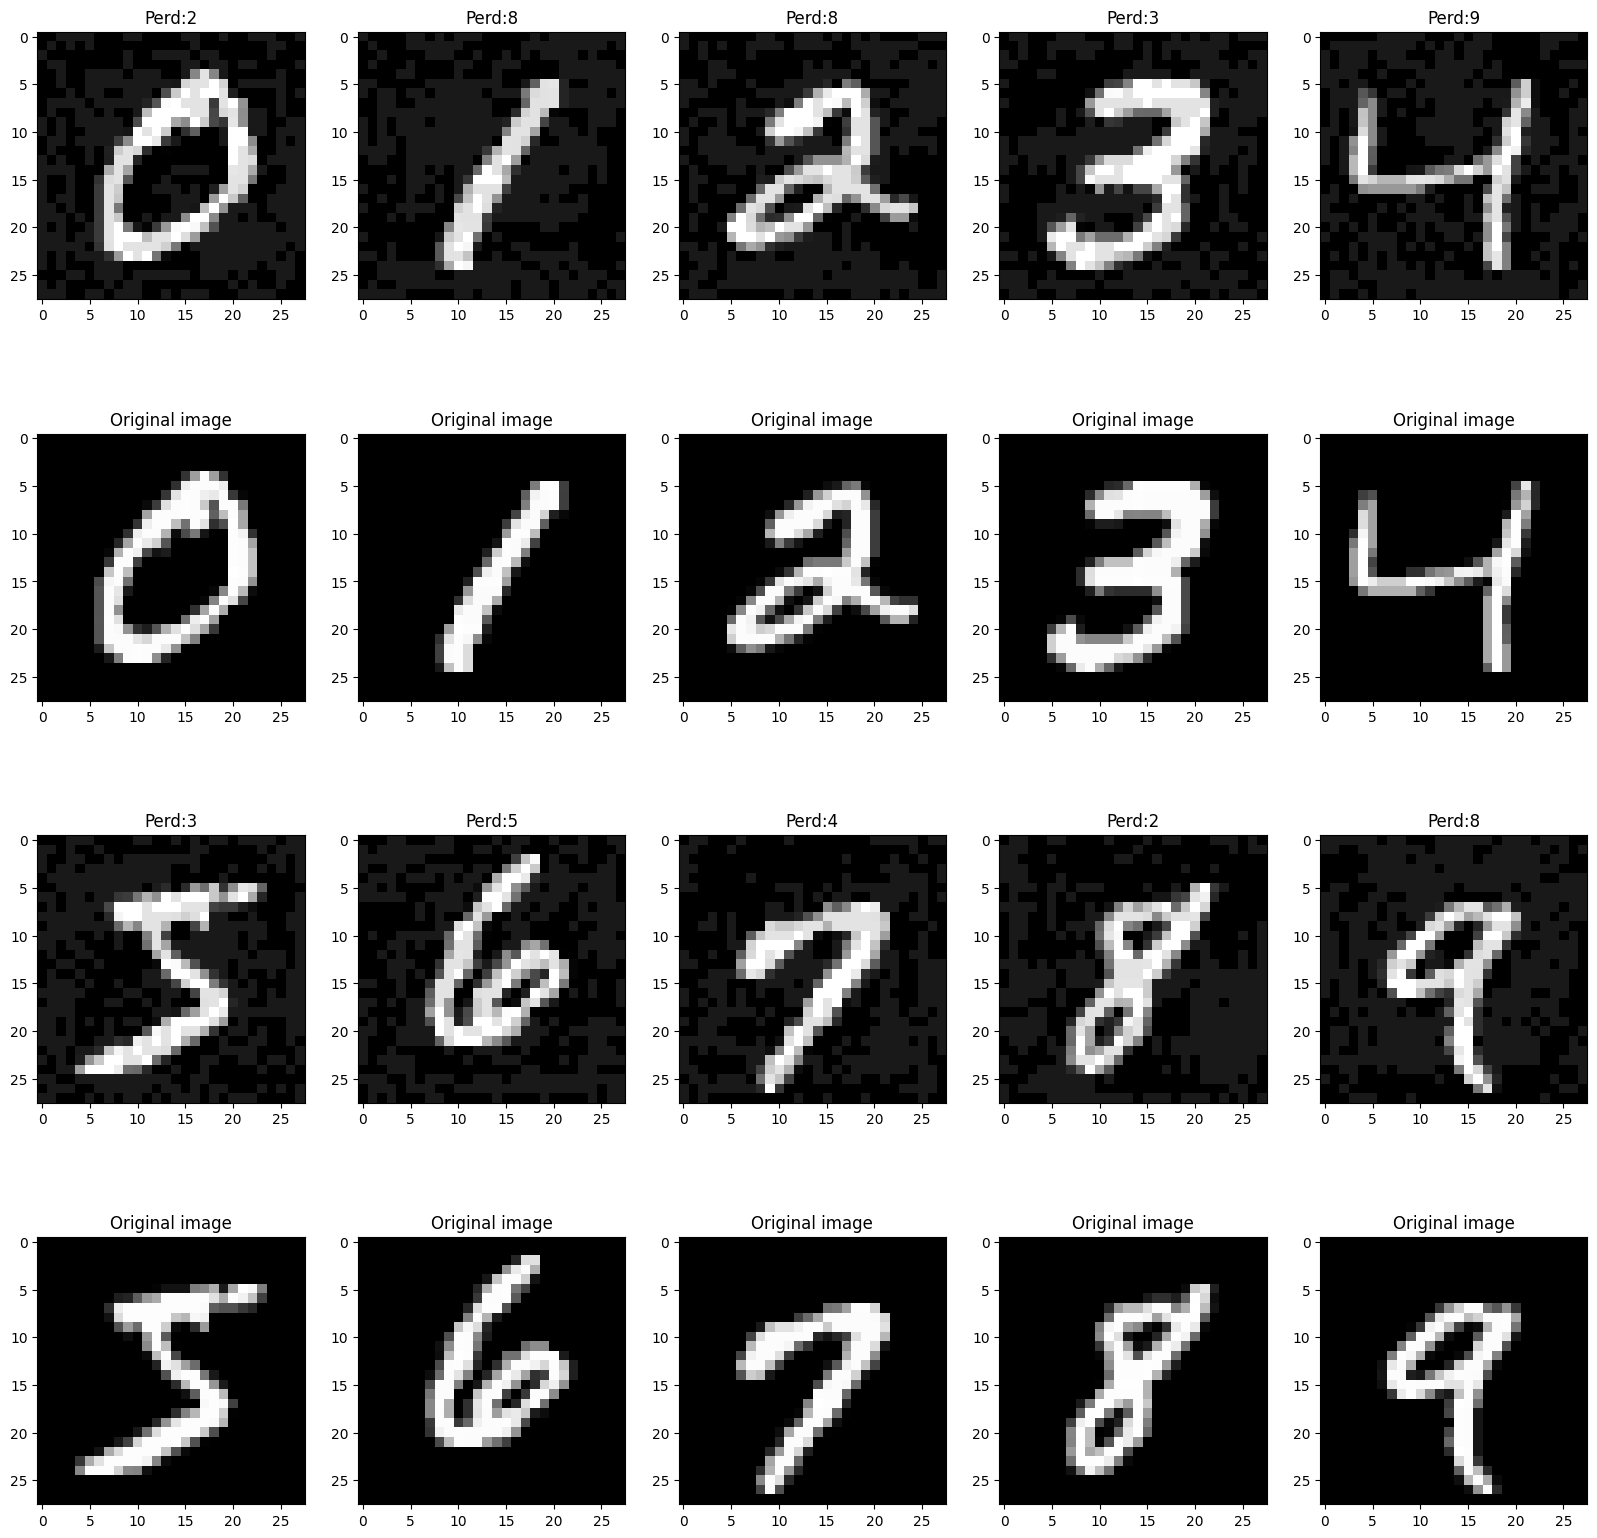

In [32]:
figure = plt.figure(figsize=(20,20))

for i in range(0, 5):
  for j in range(0, 2):
    for k in range(len(y_train)):
      if y_train[k][i+5*j] == 1:
          image = X_train[k]
          label = i+5*j
          figure.add_subplot(4, 5, i+1+j*10)
          plt.imshow(perturbed_x_train[k],cmap='gray')
          plt.title(f'Perd:{predict[k].argmax(axis=-1)}')
          #plt.show()
          figure.add_subplot(4, 5, i+6+j*10)
          plt.imshow(image.squeeze(), cmap='gray')
          plt.title('Original image')
          #plt.show()
          # print('Model Predict:', end = ' ')
          # print(predict[k].argmax(axis=-1))
          # print('Real Label:', end = ' ')
          # print(label, '\n---------------------------------------------------------------------')

          break
plt.savefig('HW1-Q2-Q2-4.png')

In [40]:
def pgd_attack(model, images, labels, epsilon=0.1, alpha=0.005, iterations=20):
    """
    Perform PGD attack on a set of images.

    Parameters:
    - model: The Keras model to attack.
    - images: Input images.
    - labels: True labels for the images.
    - epsilon: The maximum perturbation allowed.
    - alpha: Step size for each iteration.
    - iterations: Number of gradient ascent steps.

    Returns:
    - perturbed_images: Images modified by the PGD attack.
    """
    # Initialize perturbation with zeros
    perturbation = tf.zeros_like(images)
    # Define loss function
    loss_fn = CategoricalCrossentropy()

    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(perturbation)
            # Add perturbation to images and clip to ensure valid pixel range
            perturbed_images = tf.clip_by_value(images + perturbation, 0, 1)
            # Calculate model's prediction on the perturbed images
            predictions = model(perturbed_images)
            # Calculate loss with respect to the true labels
            loss = loss_fn(labels, predictions)

        # Calculate gradients of loss with respect to perturbation
        gradients = tape.gradient(loss, perturbation)
        # Update perturbation with a small step in the direction of the gradient
        perturbation = perturbation + alpha * tf.sign(gradients)
        # Project the perturbation to the epsilon-ball (L-infinity norm)
        perturbation = tf.clip_by_value(perturbation, -epsilon, epsilon)

    # Apply final perturbation to the original images
    perturbed_images = tf.clip_by_value(images + perturbation, 0, 1)

    return perturbed_images

In [41]:
perturbed_x_train = pgd_attack(model, X_train.copy(), y_train.copy())

In [52]:
model.evaluate(perturbed_x_train, y_train, batch_size=128)
predict = model.predict(perturbed_x_train, verbose = 0)

469/469 [==============================] - 3s 7ms/step - loss: 26.7184 - accuracy: 0.0168


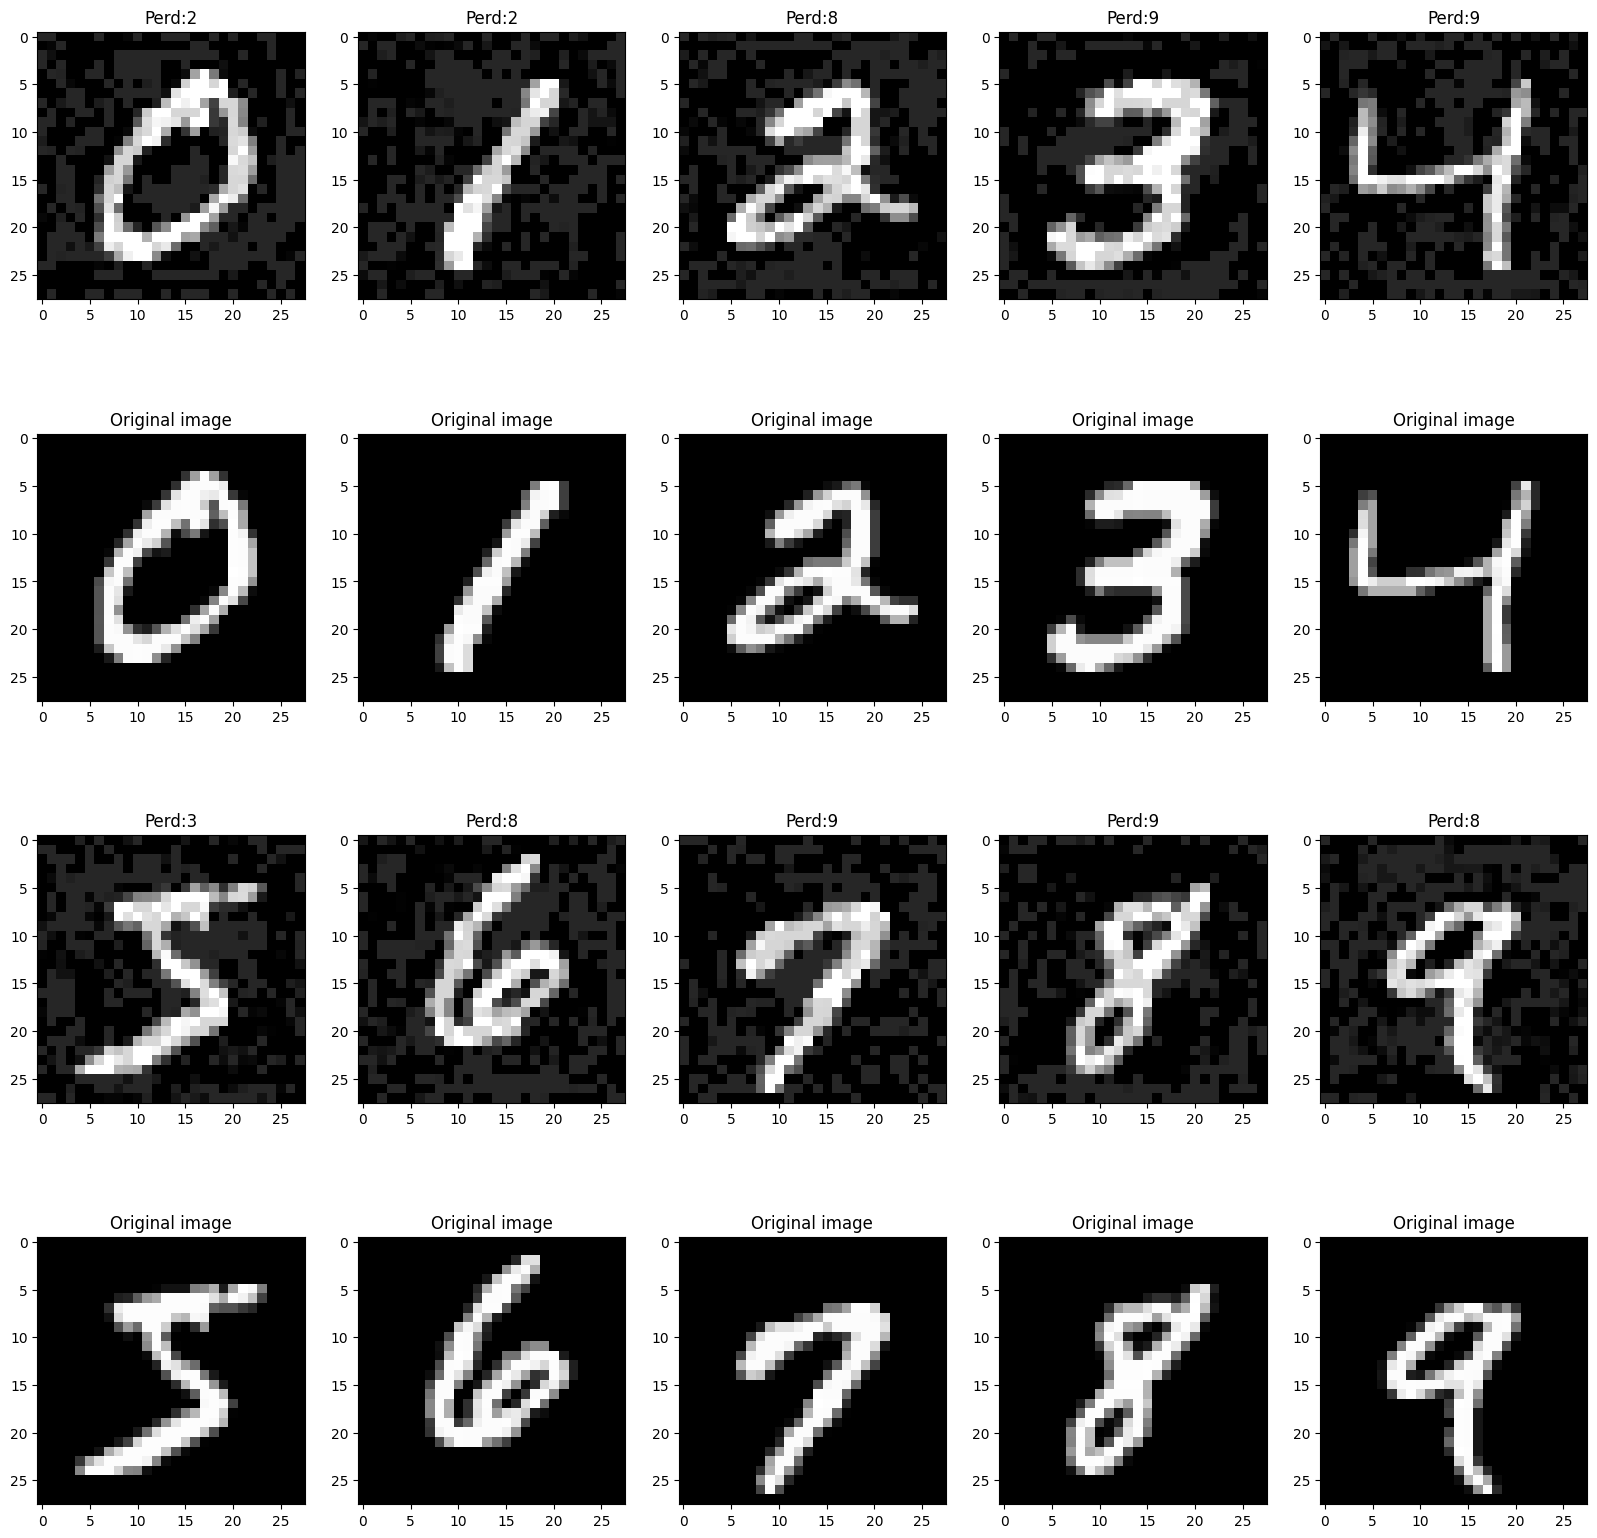

In [55]:
figure = plt.figure(figsize=(20,20))

for i in range(0, 5):
  for j in range(0, 2):
    for k in range(len(y_train)):
      if y_train[k][i+5*j] == 1:
          image = X_train[k]
          label = i+5*j
          figure.add_subplot(4, 5, i+1+j*10)
          plt.imshow(perturbed_x_train[k],cmap='gray')
          plt.title(f'Perd:{predict[k].argmax(axis=-1)}')
          #plt.show()
          figure.add_subplot(4, 5, i+6+j*10)
          plt.imshow(image.squeeze(), cmap='gray')
          plt.title('Original image')
          #plt.show()
          # print('Model Predict:', end = ' ')
          # print(predict[k].argmax(axis=-1))
          # print('Real Label:', end = ' ')
          # print(label, '\n---------------------------------------------------------------------')

          break
plt.show()

In [ ]:
def show_image(index, label, model, perturbed_x_train, X_train, model_perdict):
  plt.imshow(perturbed_x_train[index])
  plt.title('Perturbed image')
  plt.show()
  plt.imshow(X_train[index])
  plt.title('Original image')
  plt.show()
  print('Model Predict:', end = ' ')
  print(model_perdict[index].argmax(axis=-1))
  print('Real Label:', end = ' ')
  print(label, '\n---------------------------------------------------------------------')

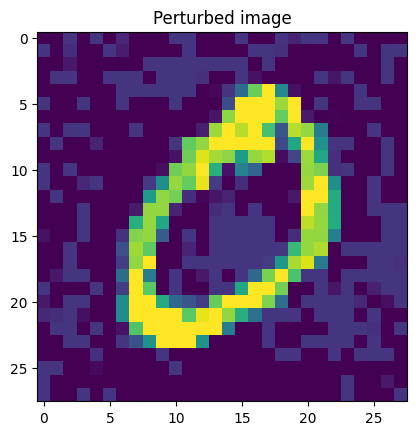

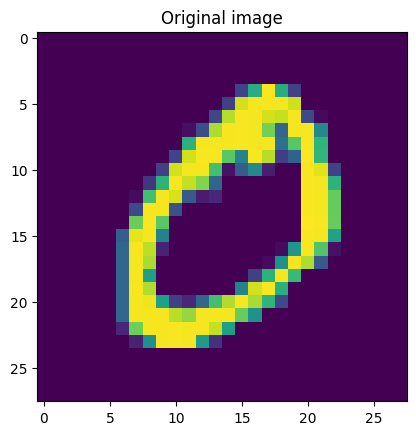

Model Predict: 2
Real Label: 0 
---------------------------------------------------------------------


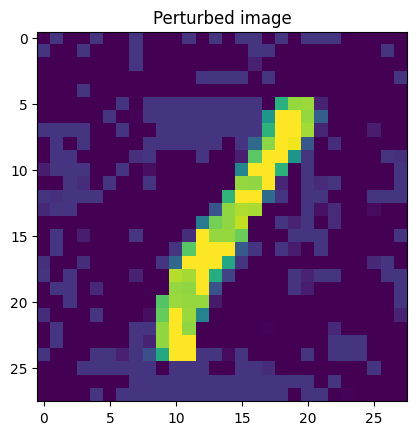

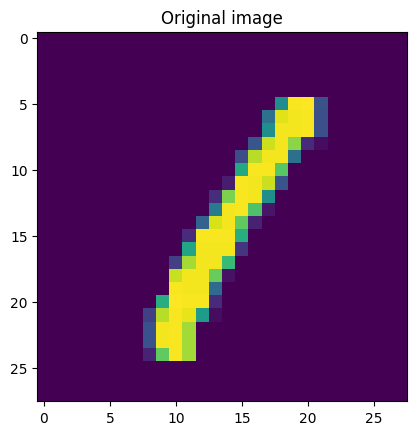

Model Predict: 7
Real Label: 1 
---------------------------------------------------------------------


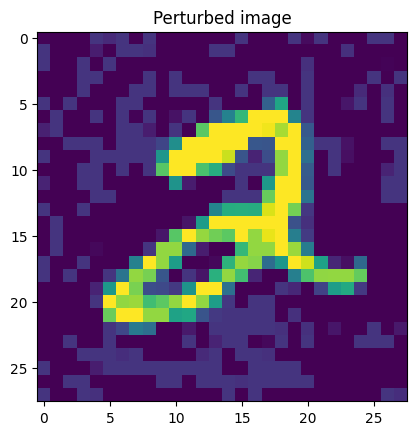

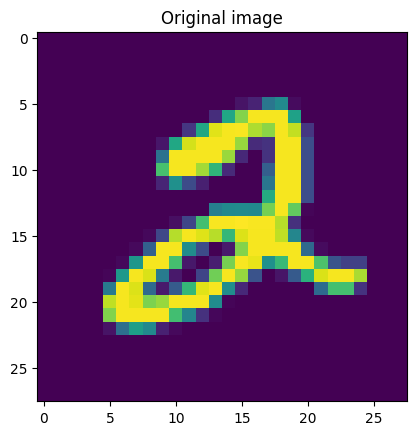

Model Predict: 3
Real Label: 2 
---------------------------------------------------------------------


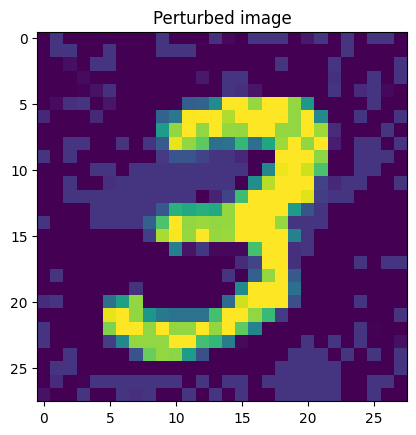

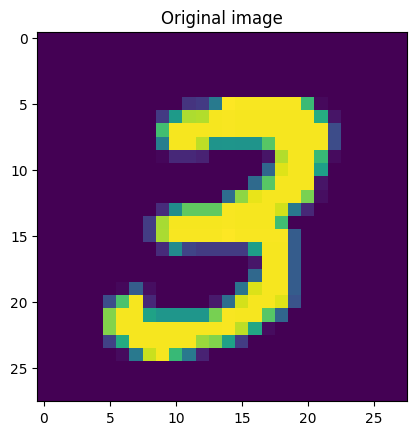

Model Predict: 9
Real Label: 3 
---------------------------------------------------------------------


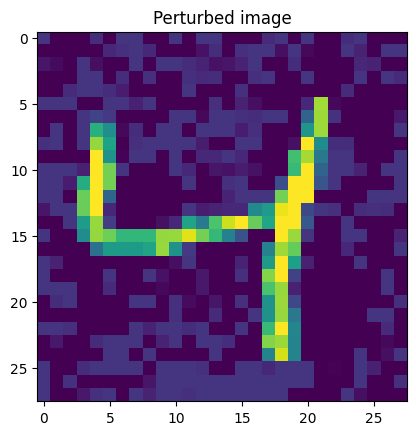

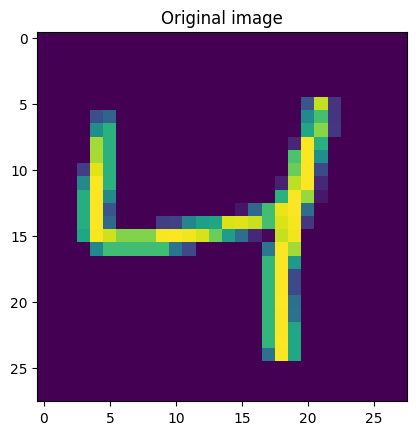

Model Predict: 7
Real Label: 4 
---------------------------------------------------------------------


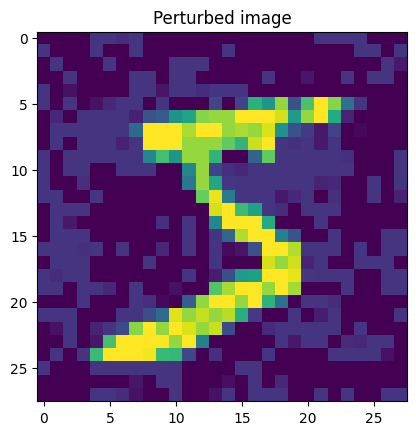

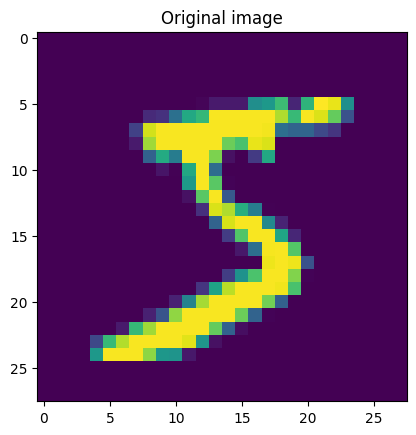

Model Predict: 3
Real Label: 5 
---------------------------------------------------------------------


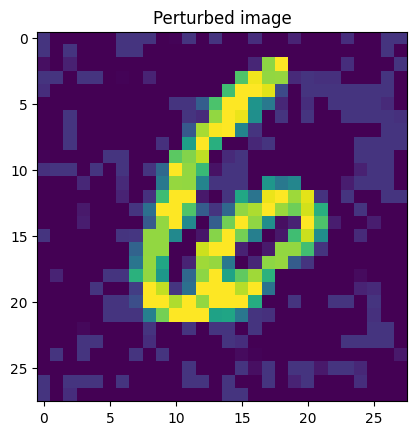

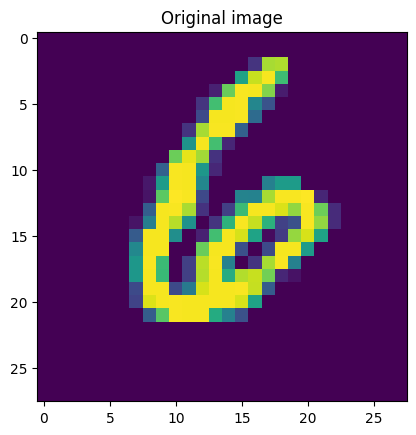

Model Predict: 5
Real Label: 6 
---------------------------------------------------------------------


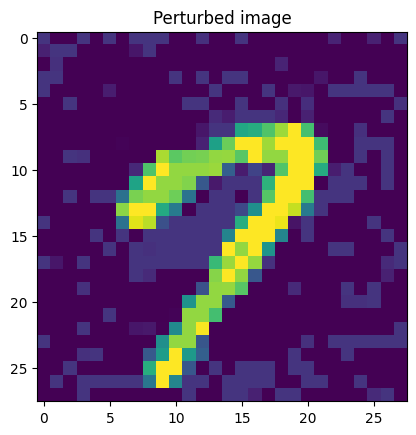

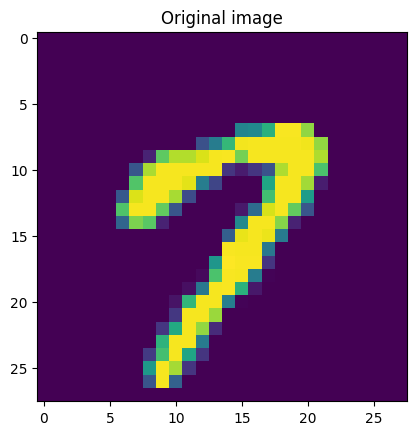

Model Predict: 9
Real Label: 7 
---------------------------------------------------------------------


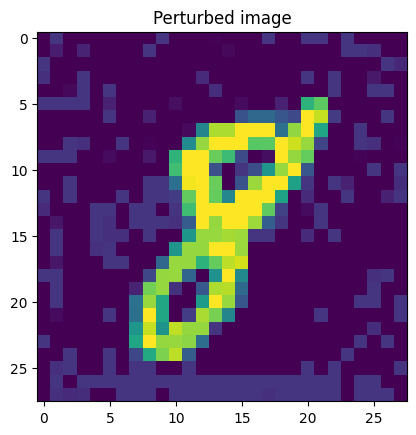

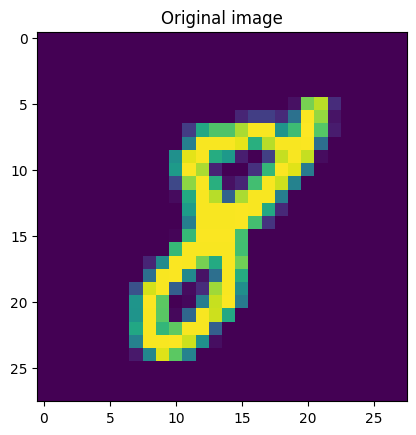

Model Predict: 9
Real Label: 8 
---------------------------------------------------------------------


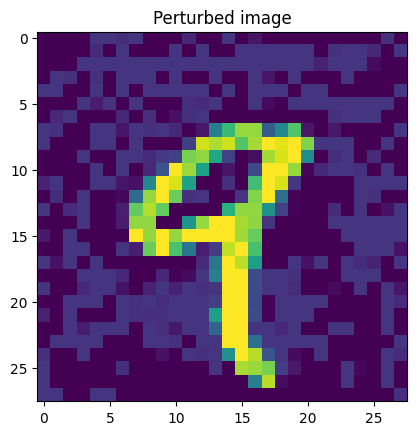

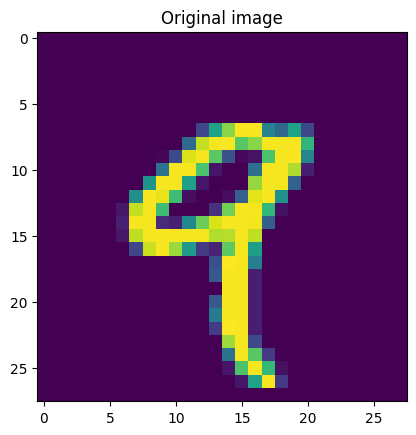

Model Predict: 8
Real Label: 9 
---------------------------------------------------------------------


In [ ]:
for i in range(10):
  for image in range(y_train.shape[0]):
    if y_train[image][i] == 1:
      show_image(image, i, model, perturbed_x_train, X_train, predict)
      break